<a href="https://colab.research.google.com/github/alfariziraju/Praktek-PCD-G211220061/blob/main/CNN_G211220061.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow matplotlib scikit-learn

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 105ms/step - accuracy: 0.8581 - loss: 0.5078 - val_accuracy: 0.9813 - val_loss: 0.0605
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 99ms/step - accuracy: 0.9806 - loss: 0.0625 - val_accuracy: 0.9874 - val_loss: 0.0388
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.9885 - loss: 0.0389 - val_accuracy: 0.9892 - val_loss: 0.0329
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.9898 - loss: 0.0318 - val_accuracy: 0.9891 - val_loss: 0.0306
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.9926 - loss: 0.0242 - val_accuracy: 0.9898 - val_loss: 0.0307
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.9

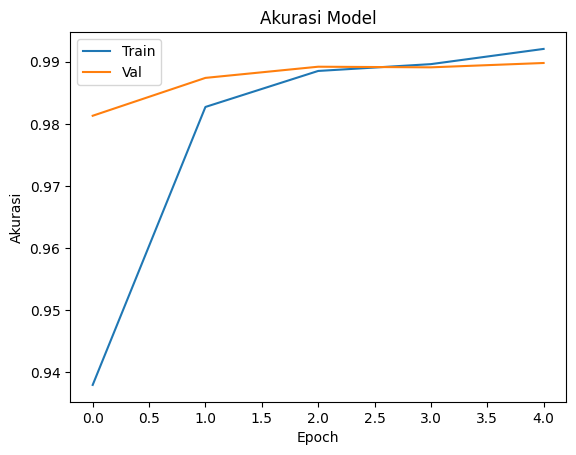

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., None]
x_test = x_test[..., None]

# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
hist = model.fit(x_train, y_train, epochs=5, batch_size=128,
                 validation_data=(x_test, y_test))

# Evaluasi model
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

# Plot akurasi
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(['Train', 'Val'])
plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 106ms/step - accuracy: 0.7246 - loss: 0.7873 - val_accuracy: 0.8549 - val_loss: 0.4040
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.8702 - loss: 0.3607 - val_accuracy: 0.8765 - val_loss: 0.3476
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.8858 - loss: 0.3151 - val_accuracy: 0.8827 - val_loss: 0.3233
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 97ms/step - accuracy: 0.8976 - loss: 0.2819 - val_accuracy: 0.8906 - val_loss: 0.2964
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9079 - loss: 0.2496 - val_accuracy: 0.8991 - val_loss: 0.2785
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.84      0.84      1000
           3       0.92      0.89      0.90      1000
           4       0.79      0.88      0.8

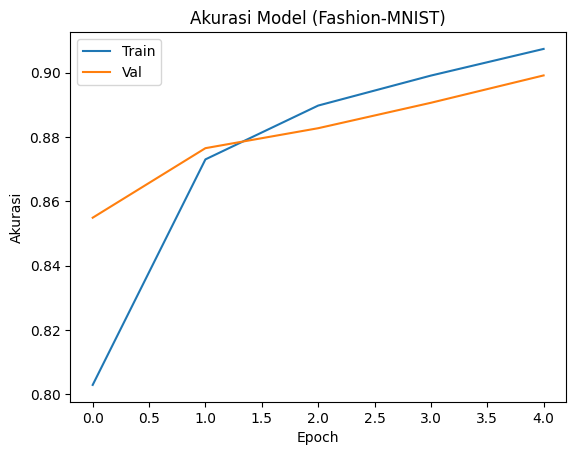

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# === Ganti dataset ke Fashion-MNIST ===
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., None]
x_test = x_test[..., None]

# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
hist = model.fit(x_train, y_train, epochs=5, batch_size=128,
                 validation_data=(x_test, y_test))

# Evaluasi
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

# Plot akurasi
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model (Fashion-MNIST)')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(['Train', 'Val'])
plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 143ms/step - accuracy: 0.3656 - loss: 1.7555 - val_accuracy: 0.5417 - val_loss: 1.2801
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 142ms/step - accuracy: 0.5577 - loss: 1.2516 - val_accuracy: 0.5872 - val_loss: 1.1744
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 135ms/step - accuracy: 0.6190 - loss: 1.0907 - val_accuracy: 0.6409 - val_loss: 1.0305
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 135ms/step - accuracy: 0.6592 - loss: 0.9783 - val_accuracy: 0.6468 - val_loss: 0.9964
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 134ms/step - accuracy: 0.6874 - loss: 0.9046 - val_accuracy: 0.6738 - val_loss: 0.9427
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1000
           1       0.77      0.81      0.79      1000
           2       0.49      0.63      0.56      1000
           3       0.58      0.39      0.47      1000
           4       0.62      0.61    

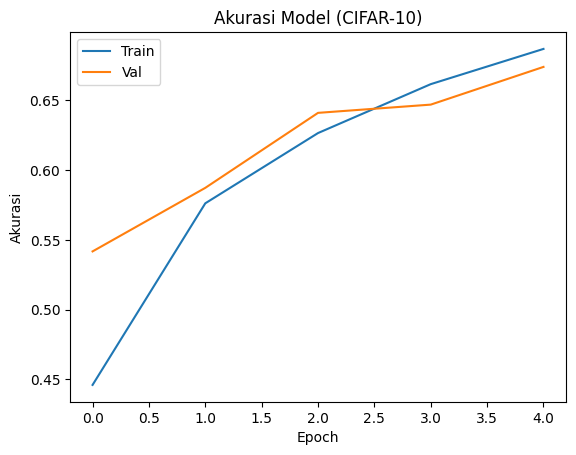

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# === Ganti dataset ke CIFAR-10 ===
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
hist = model.fit(x_train, y_train, epochs=5, batch_size=128,
                 validation_data=(x_test, y_test))

# Evaluasi
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

# Plot akurasi
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model (CIFAR-10)')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(['Train', 'Val'])
plt.show()

DATASET: MNIST


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 93ms/step - accuracy: 0.8671 - loss: 0.4845 - val_accuracy: 0.9834 - val_loss: 0.0541
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9817 - loss: 0.0604 - val_accuracy: 0.9864 - val_loss: 0.0415
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.9881 - loss: 0.0388 - val_accuracy: 0.9906 - val_loss: 0.0307
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.9923 - loss: 0.0264 - val_accuracy: 0.9910 - val_loss: 0.0284
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.9936 - loss: 0.0204 - val_accuracy: 0.9884 - val_loss: 0.0349
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

CLASSIFICATION REPORT for MNIST
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
          

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 98ms/step - accuracy: 0.7430 - loss: 0.7488 - val_accuracy: 0.8562 - val_loss: 0.4031
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.8707 - loss: 0.3617 - val_accuracy: 0.8782 - val_loss: 0.3389
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.8900 - loss: 0.3060 - val_accuracy: 0.8882 - val_loss: 0.3127
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.8995 - loss: 0.2790 - val_accuracy: 0.8955 - val_loss: 0.2870
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.9082 - loss: 0.2529 - val_accuracy: 0.9003 - val_loss: 0.2757
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

CLASSIFICATION REPORT for Fashion-MNIST
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.84      0.86      1000
           3       0.87      0.93      0.90      1000
  

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 145ms/step - accuracy: 0.3530 - loss: 1.7770 - val_accuracy: 0.5281 - val_loss: 1.3259
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 54s 139ms/step - accuracy: 0.5545 - loss: 1.2483 - val_accuracy: 0.6030 - val_loss: 1.1382
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 146ms/step - accuracy: 0.6215 - loss: 1.0852 - val_accuracy: 0.6455 - val_loss: 1.0335
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 136ms/step - accuracy: 0.6637 - loss: 0.9709 - val_accuracy: 0.6665 - val_loss: 0.9695
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 135ms/step - accuracy: 0.6919 - loss: 0.8968 - val_accuracy: 0.6787 - val_loss: 0.9324
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

CLASSIFICATION REPORT for CIFAR-10
              precision    recall  f1-score   support

           0       0.65      0.81      0.72      1000
           1       0.74      0.85      0.79      1000
           2       0.62      0.48      0.54      1000
           3       0.54      0.44      0.48      1000
 

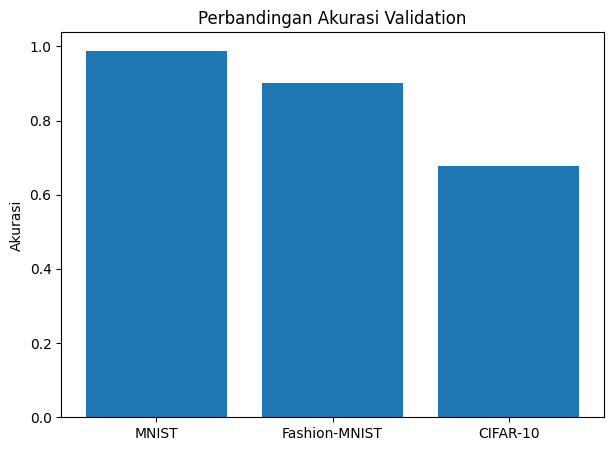

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# -------------------------------------------
# FUNCTION UNTUK TRAIN + EVALUATE
# -------------------------------------------
def run_experiment(name, loader, img_shape):
    print("="*80)
    print("DATASET:", name)
    print("="*80)

    # Load dataset
    (x_train, y_train), (x_test, y_test) = loader()

    # Untuk CIFAR10, label perlu flatten
    y_train = y_train.flatten()
    y_test = y_test.flatten()

    # Normalisasi
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    # Untuk grayscale → tambahkan channel dim
    if x_train.ndim == 3:
        x_train = x_train[..., None]
        x_test = x_test[..., None]

    # Build model
    model = build_model(img_shape)

    # Train
    hist = model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=128,
        validation_data=(x_test, y_test),
        verbose=1
    )

    # Predict
    y_pred = np.argmax(model.predict(x_test), axis=1)

    # Classification report
    print("\nCLASSIFICATION REPORT for", name)
    print(classification_report(y_test, y_pred))

    # Return metrics
    return {
        "Dataset": name,
        "Train Acc": hist.history['accuracy'][-1],
        "Val Acc": hist.history['val_accuracy'][-1]
    }


# =============================================================
#              JALANKAN EXPERIMENT UNTUK 3 DATASET
# =============================================================
results = []

# MNIST
results.append(run_experiment(
    "MNIST",
    tf.keras.datasets.mnist.load_data,
    (28,28,1)
))

# Fashion-MNIST
results.append(run_experiment(
    "Fashion-MNIST",
    tf.keras.datasets.fashion_mnist.load_data,
    (28,28,1)
))

# CIFAR-10
results.append(run_experiment(
    "CIFAR-10",
    tf.keras.datasets.cifar10.load_data,
    (32,32,3)
))

# =============================================================
#                 TABEL PERBANDINGAN AKURASI
# =============================================================
df = pd.DataFrame(results)
print("\n\n===== PERBANDINGAN AKURASI =====")
print(df)

# Plot perbandingan
plt.figure(figsize=(7,5))
plt.bar(df["Dataset"], df["Val Acc"])
plt.title("Perbandingan Akurasi Validation")
plt.ylabel("Akurasi")
plt.show()